# Visualização dos Dados

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import math
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from itertools import chain

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset/survey_results_public_clean.csv', sep=',', encoding='utf-8')
df.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar
0,0,1,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,dev,employed_full_time,remote,hobby;open_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,canada,CAD,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,Very unfavorable,daily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources_(e.g._vid...,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,40205.0
3,3,4,dev,employed_full_time,remote,i_don’t_code_outside_of_work,bachelor,books;school_(i.e._university_college_etc),NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,215232.0
4,4,5,dev,employed_full_time,hybrid,hobby,bachelor,other_online_resources_(e.g._videos_blogs_foru...,technical_documentation;blogs;stack_overflow;o...,NaN,8,3,developer_front_end;developer_full_stack;devel...,20 to 99 employees,united_states_of_america,USD,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,Firebase;Microsoft Azure,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,Angular;ASP.NET Core ;Blazor;Node.js,.NET,.NET;Apache Kafka,npm,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,Unfavorable,multiple_day,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      73268 non-null  int64  
 1   ResponseId                      73268 non-null  int64  
 2   MainBranch                      73268 non-null  object 
 3   Employment                      71709 non-null  object 
 4   RemoteWork                      58958 non-null  object 
 5   CodingActivities                58899 non-null  object 
 6   EdLevel                         71571 non-null  object 
 7   LearnCode                       71580 non-null  object 
 8   LearnCodeOnline                 50685 non-null  object 
 9   LearnCodeCoursesCert            29389 non-null  object 
 10  YearsCode                       71331 non-null  object 
 11  YearsCodePro                    51833 non-null  object 
 12  DevType                         

## Primeira seção

Questões 1 a 18

### Perfil

Aqui observamos o perfil dos respondentes, categorizando-os em Desenvolvedor(a) (`dev`), Estudando (`learner`), Desenvolvedor(a) parcial (`part_dev`), Amador(a) (`hobbyist`), e Ex-desenvolvedor(a) (`ex_dev`). Respondentes que não se enquadram em nenhuma das descrições acima selecionaram `none`.

<AxesSubplot:xlabel='COUNT', ylabel='MainBranch'>

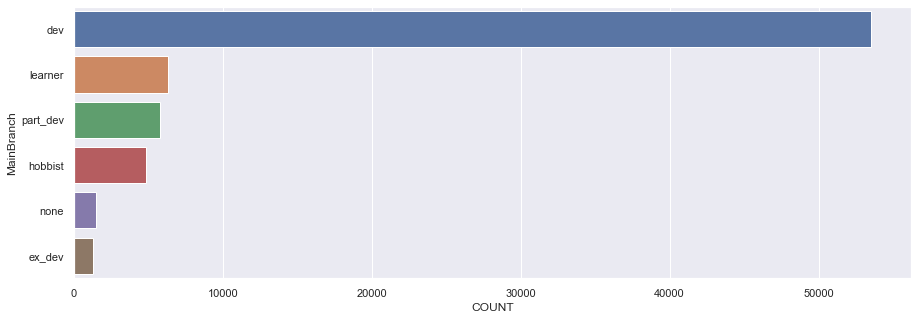

In [13]:
dfg_main_branch = df.groupby(['MainBranch']).size().reset_index(name = 'COUNT').sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=dfg_main_branch, x="COUNT", y="MainBranch", orient="h")

### Emprego



Para a próxima visualização precisamos extrair as alternativas possíveis, pois se trata de uma questão de múltipla escolha.

In [60]:
employment_categories = set(chain.from_iterable(x.split(";") for x in df['Employment'] if isinstance(x, str)))
employment_categories

{'employed_full_time',
 'employed_part_time',
 'independent',
 'opt_out',
 'retired',
 'student_full_time',
 'student_part_time',
 'unemployed_looking',
 'unemployed_not_looking'}

Assim podemos observar a quantidade de respondentes que marcaram cada opção, lembrando que se trata de uma questão de múltipla escolha.

<AxesSubplot:xlabel='count', ylabel='category'>

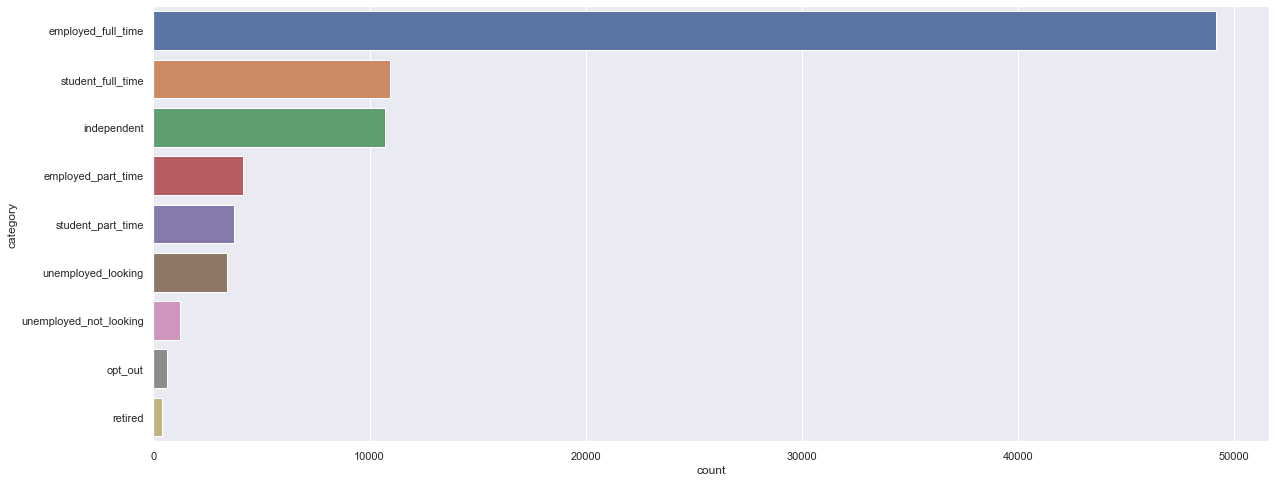

In [58]:
dfg_employment = pd.DataFrame()

for category in employment_categories:
  dfg_employment = dfg_employment.append({'category': category, 'count': df['Employment'].str.contains(category).sum()}, ignore_index=True)

dfg_employment = dfg_employment.sort_values('count', ascending=False)

plt.figure(figsize=(20,9))
sns.barplot(data=dfg_employment, x="count", y="category", orient="h")

No gráfico abaixo observamos que a maioria dos respondentes trabalham de forma remota ou híbrida, enquanto poucos trabalham pessoalmente.

<AxesSubplot:xlabel='COUNT', ylabel='RemoteWork'>

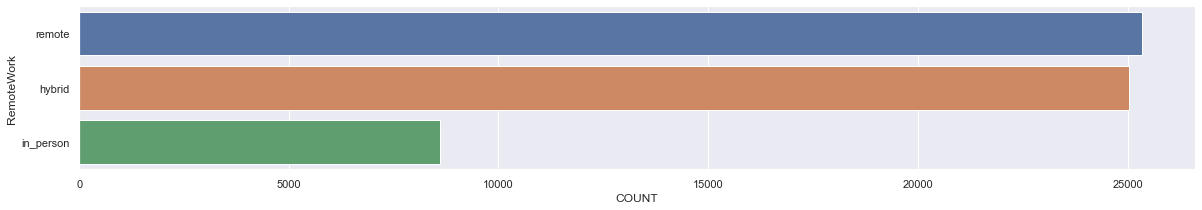

In [62]:
dfg_remote_work = df.groupby(['RemoteWork']).size().reset_index(name = 'COUNT').sort_values('COUNT', ascending=False)

plt.figure(figsize=(20,3))
sns.barplot(data=dfg_remote_work, x="COUNT", y="RemoteWork", orient="h")

### Atividades

Novamente precisamos extrair as alternativas possíveis, pois se trata de uma questão de múltipla escolha.

In [63]:
activities_categories = set(chain.from_iterable(x.split(";") for x in df['CodingActivities'] if isinstance(x, str)))
activities_categories

{'business',
 'freelance',
 'hobby',
 'i_don’t_code_outside_of_work',
 'open_source',
 'other_(please_specify):',
 'school'}

Assim podemos observar a quantidade de respondentes que marcaram cada opção, lembrando que se trata de uma questão de múltipla escolha.

C:\Users\nicbu\AppData\Local\Temp\ipykernel_8964\3219123141.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfg_activities = dfg_activities.append({'category': category, 'count': df['CodingActivities'].str.contains(category).sum()}, ignore_index=True)


<AxesSubplot:xlabel='count', ylabel='category'>

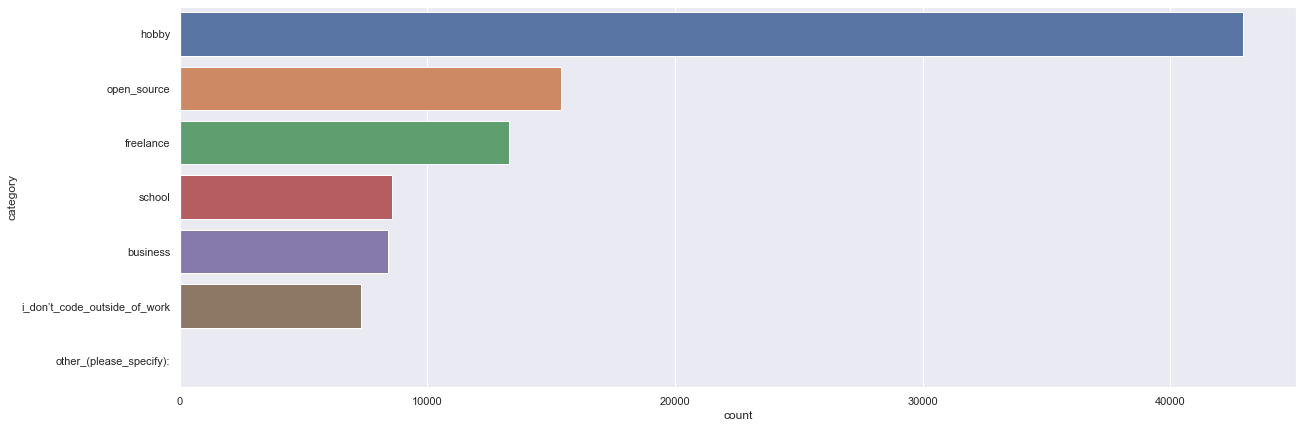

In [65]:
dfg_activities = pd.DataFrame()

for category in activities_categories:
  dfg_activities = dfg_activities.append({'category': category, 'count': df['CodingActivities'].str.contains(category).sum()}, ignore_index=True)

dfg_activities = dfg_activities.sort_values('count', ascending=False)

plt.figure(figsize=(20,7))
sns.barplot(data=dfg_activities, x="count", y="category", orient="h")

### Nível de educação

<AxesSubplot:xlabel='COUNT', ylabel='EdLevel'>

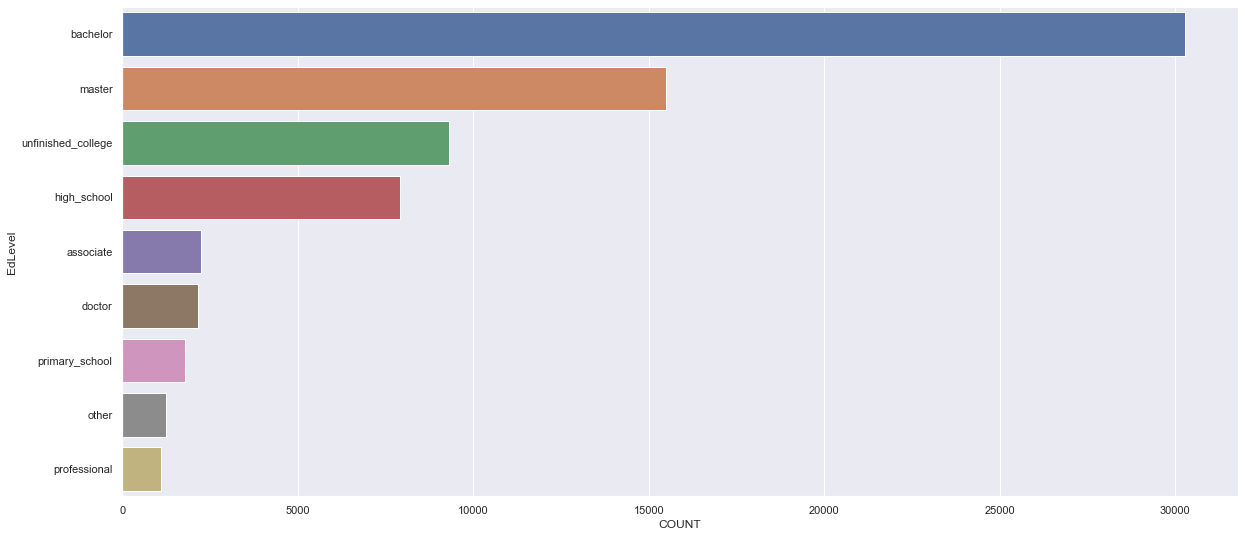

In [67]:
dfg_ed_level = df.groupby(['EdLevel']).size().reset_index(name = 'COUNT').sort_values('COUNT', ascending=False)

plt.figure(figsize=(20,9))
sns.barplot(data=dfg_ed_level, x="COUNT", y="EdLevel", orient="h")

### Métodos de aprendizagem

Novamente precisamos extrair as alternativas possíveis, pois se trata de uma questão de múltipla escolha.

In [68]:
learncode_categories = set(chain.from_iterable(x.split(";") for x in df['LearnCode'] if isinstance(x, str)))
learncode_categories

{'books',
 'bootcamp',
 'colleague',
 'hackathons_(virtual_or_in_person)',
 'job',
 'online_course',
 'other_(please_specify):',
 'other_online_resources_(e.g._videos_blogs_forum)',
 'school_(i.e._university_college_etc)',
 'someone'}

Assim podemos observar a quantidade de respondentes que marcaram cada opção, lembrando que se trata de uma questão de múltipla escolha.

C:\Users\nicbu\AppData\Local\Temp\ipykernel_8964\1380938098.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfg_learncode = dfg_learncode.append({'category': category, 'count': df['LearnCode'].str.contains(category).sum()}, ignore_index=True)
C:\Users\nicbu\AppData\Local\Temp\ipykernel_8964\1380938098.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfg_learncode = dfg_learncode.append({'category': category, 'count': df['LearnCode'].str.contains(category).sum()}, ignore_index=True)
C:\Users\nicbu\AppData\Local\Temp\ipykernel_8964\1380938098.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfg_learncode = dfg_learncode.append({'category': category, 'count': df['LearnCode'].str.contains(category).sum()}, ignore_inde

<AxesSubplot:xlabel='count', ylabel='category'>

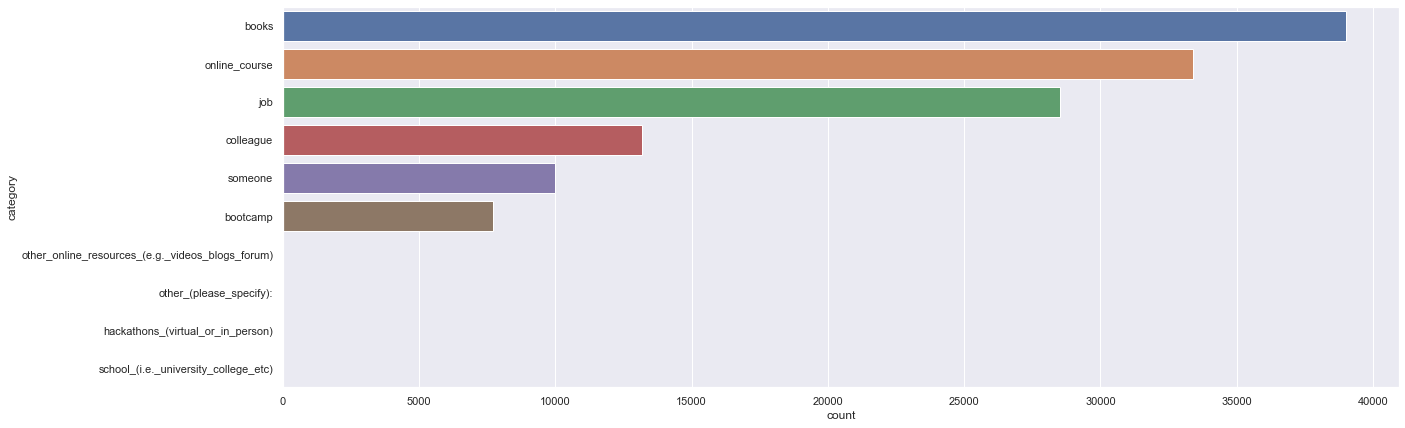

In [70]:
dfg_learncode = pd.DataFrame()

for category in learncode_categories:
  dfg_learncode = dfg_learncode.append({'category': category, 'count': df['LearnCode'].str.contains(category).sum()}, ignore_index=True)

dfg_learncode = dfg_learncode.sort_values('count', ascending=False)

plt.figure(figsize=(20,7))
sns.barplot(data=dfg_learncode, x="count", y="category", orient="h")

### Experiência 

In [ ]:
# TODO converter YearsCode para número e descartar <1 e >50